## Linear Algebra

Linear algebra refers to the study of linear relationships. In this class, we will cover some basic concepts of linear algebra that are needed to understand some more advanced and *practical* concepts and definitions. If you are interested in the concepts related to linear algebra and application, there is an excellent online series that covers these topics in detail 

https://github.com/fastai/numerical-linear-algebra


Linear algebra is a fundamental component of machine learning, so if you are interested in using machine learning in the future go and check that class. 


### Vectors

A vector is a collection of numbers. Vectors can be **row vectors** or **column vectors** depending on their orientation. In general, you can assume that a vector is a **column vector** unless otherwise stated. 


In [1]:
import numpy as np
vector_row = np.array([[1, -5, 3, 2, 4]])
vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


The transpose ($T$) of a vector is an operation that transform a column vector into a row vector and a row vector into a column vector. If $v$ is a vector, then $v^{T}$ is the transpose.

In [3]:
vector_row, vector_row.T

(array([[ 1, -5,  3,  2,  4]]),
 array([[ 1],
        [-5],
        [ 3],
        [ 2],
        [ 4]]))

The norm of a vector is a measure of its lenght. There are many ways to measure lenght and you can use different definitions depending on the application. The most common norm is the $L_2$ norm, if $v$ is a vector, then the $L_2$ norm ($\Vert v \Vert_{2}$) is 

$$
\Vert v \Vert_{2} = \sqrt{\sum_i v_i^2}
$$

This is also known as the Euclidian norm. 

Others well known norms are the $L_1$ norm (or Manhattan Distance), and the $L_\infty$ norm (or infinity norm) equal to the maximum absolut value of the vector 

In [5]:
from numpy.linalg import norm
new_vector = vector_row.T
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('L_1 is: %.1f'%norm_1)
print('L_2 is: %.1f'%norm_2)
print('L_inf is: %.1f'%norm_inf)

L_1 is: 15.0
L_2 is: 7.4
L_inf is: 5.0


The **dot product**  of two vectors is the sum of the product of the respective elements in each vector and is denoted by $\cdot$. If $v$ and $w$ are vectors, then the dot product is defined as 
$$
d = v \cdot w= \sum_{i = 1}^{n} v_iw_i
$$

alternatively, the dot product can be computed as 

$$
v \cdot w = \Vert v \Vert_{2} \Vert w \Vert_{2} \cos{\theta}
$$

where $\theta$ is the angle between the vectors. In the same way, the angle between two vector can be computed as 

$$
\theta = cos^{-1}\left[\frac{v \cdot w }{\Vert v \Vert_{2} \Vert w \Vert_{2}}\right]
$$

In [17]:
#lets take two vectors that are on the same direction but have different lenghts 
from numpy import arccos, dot
v = np.array([[1,2]])
w = np.array([[5,10]])
theta = arccos(v.dot(w.T)/(norm(v)*norm(w)))
theta*(180/pi) #arcos return gradients, we are convering to degrees

array([[8.53773646e-07]])

In [18]:
#lets take two vectors that are on opposite directions 
from numpy import arccos, dot, pi
v = np.array([[1,2]])
w = np.array([[-1,-2]])
theta = arccos(v.dot(w.T)/(norm(v)*norm(w)))
theta*(180/pi) #arcos return gradients, we are convering to degrees 

array([[179.99999879]])

In [23]:
#lets take two vectors that are on orthogonal to eachother 
from numpy import arccos, dot, pi
v = np.array([[1,1]])
w = np.array([[-1,1]])
theta = arccos(v.dot(w.T)/(norm(v)*norm(w)))
theta*(180/pi) #arcos return gradients, we are convering to degrees 

array([[90.]])

The **cross product** between two vectors, $v$ and $w$, is written $v\times w$. It is defined by 

$$
v \times w = \Vert v \Vert_{2}\Vert w \Vert_{2}\sin{(\theta)} 
$$

where $θ$ is the angle between the $v$ and $w$.

The geometric interpretation of the cross product is a vector perpendicular to both $v$ and $w$ with length (as measured by $L_2$) equal to the area enclosed by the parallelogram created by the two vectors.

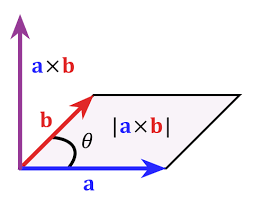

In [24]:
v = np.array([[0, 2, 0]])
w = np.array([[3, 0, 0]])
cross = np.cross(v, w)
print(cross)

[[ 0  0 -6]]


In [26]:
arccos(v.dot(cross.T)/(norm(v)*norm(cross)))*(180/pi)

array([[90.]])

In [27]:
arccos(w.dot(cross.T)/(norm(w)*norm(cross)))*(180/pi)

array([[90.]])

### Matrices 

An $n \times m $ matrix is a rectangular table of numbers consisting of $m$ rows and $n$ columns.

The norm of a matrix can be consider as a kind of vector norm by alingming the $n * m$ elements of the matrix into a single vector
$$
\Vert M \Vert_{p} = \sqrt[p]{(\sum_i^m \sum_j^n |a_{ij}|^p)}
$$

where $p$ defines the norm order ($p=0, 1, 2,...$)


**Matrix multiplication** between two matrices, $P$ and $Q$, is defined when $P$ is an $m \timed p$ matrix and $Q$ is a $p \times n$ matrix. The result of $M=PQ$ is a matrix $M$ that is $m \times n$. The dimension with size $p$ is called the inner matrix dimension, and the inner matrix dimensions must match (i.e., the number of columns in $P$ and the number of rows in $Q$ must be the same) for matrix multiplication. The dimensions $m$ and $n$ are called the outer matrix dimensions. Formally,  $M=PQ$ is defined as
$$
M_{ij} = \sum_{k=1}^p P_{ik}Q_{kj}
$$


In [32]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(f'The dimensions of P are: {P.shape}')
print(Q, Q.shape)
print(f'The dimensions of Q are: {Q.shape}')
print(np.dot(P, Q))
print(f'The dimensions of PxQ are: {np.dot(P, Q).shape}')

[[1 7]
 [2 3]
 [5 0]]
The dimensions of P are: (3, 2)
[[2 6 3 1]
 [1 2 3 4]] (2, 4)
The dimensions of Q are: (2, 4)
[[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]
The dimensions of PxQ are: (3, 4)


In [ ]:
#what will happend here? 
np.dot(P, Q)

The **determinant** is an important property of square matrices (same number of rows and columns). The determinant is denoted by $\det(M)$ or $|M|$.

In the case of $2 \times 2$ matrices, the determinant is 
$$
\begin{split}
|M| = \begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix} = ad - bc\end{split}
$$


In the case of $3 \times 3$ matrices, the determinant is 
$$
\begin{split}
\begin{eqnarray*}
|M| = \begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix} & = & a\begin{bmatrix}
\Box &\Box  &\Box  \\
\Box & e & f \\
\Box & h & i \\
\end{bmatrix} - b\begin{bmatrix}
\Box &\Box  &\Box  \\
d & \Box & f \\
g & \Box & i \\
\end{bmatrix}+c\begin{bmatrix}
\Box &\Box  &\Box  \\
d & e & \Box \\
g & h & \Box \\
\end{bmatrix} \\
&&\\
& = & a\begin{bmatrix}
e & f \\
h & i \\
\end{bmatrix} - b\begin{bmatrix}
d & f \\
g & i \\
\end{bmatrix}+c\begin{bmatrix}
d & e \\
g & h \\
\end{bmatrix} \\ 
&&\\
& = & aei + bfg + cdh - ceg - bdi - afh
\end{eqnarray*}\end{split}
$$


Computing the determinant or larger matrices is cumbersome. However, the process can be easily automated and always reduced to computing the determinant of $2 \time 2$ matrices. Numpy includes an efficient method to compute the determinant of a matrix

In [39]:
from numpy.linalg import det

M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
print(f'M: {M}')

print(f'Determinant: {det(M):0.2f}') #note that the :0.2f limits the number of decimals printed!


M: [[0 2 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 2 1]]
Determinant: -38.00


The inverse of a square matrix $M$ is a matrix of the same size, $N$, such that $M \bullet N=I$, Where $I$ is a matrix with only ones in its diagonal (unity matrix). The inverse of a matrix $M$ is denoted as $M^{-1}$. For a $2 \times 2$ matrix, the inverse is defined as 

$$
\begin{split}
M^{-1} = \begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix}^{-1} = \frac{1}{|M|}\begin{bmatrix}
d & -b \\
-c & a\\
\end{bmatrix}\end{split}
$$

calculating the inverse of a matrix is a complex process; however, it is an important step in many calculations and several *easier* approaches have been developed.

if the determinant of a matrix is zero, then the matrix doesn't have an inverse. 

In [48]:
from numpy.linalg import inv

M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
print(f'M: {M}')

print(f'Inverse: {inv(M)}') #note that the :0.2f limits the number of decimals printed!

print(f'M x inv(M) = {np.dot(M,inv(M))}')


M: [[0 2 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 2 1]]
Inverse: [[-1.57894737 -0.07894737  1.23684211  1.10526316]
 [-0.63157895 -0.13157895  0.39473684  0.84210526]
 [ 0.68421053  0.18421053 -0.55263158 -0.57894737]
 [ 0.52631579  0.02631579 -0.07894737 -0.36842105]]
M x inv(M) = [[ 1.00000000e+00 -3.46944695e-18  5.55111512e-17  1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00  4.99600361e-16 -1.11022302e-16]
 [ 2.22044605e-16  5.20417043e-17  1.00000000e+00 -3.33066907e-16]
 [ 0.00000000e+00  1.73472348e-17  5.55111512e-17  1.00000000e+00]]


A matrix that is close to being singular (i.e., the determinant is close to 0) is called **ill-conditioned**. Although ill-conditioned matrices have inverses, they are problematic numerically in the same way that dividing a number by a very, very small number is problematic. 
The **condition number** is a measure of how ill-conditioned a matrix is, and it can be computed using Numpy’s function cond from linalg. The higher the condition number, the closer the matrix is to being singular.

The **rank** of an $m \times n$ matrix $A$ is the number of linearly independent columns or rows of $A$ (that is, you cannot write a row or column as a linear combination of other rows or columns), and is denoted by **rank(A)**. It can be shown that the number of linearly independent rows is always equal to the number of linearly independent columns for any matrix. A matrix is called full rank. if **rank (A)=min(m,n)**. The matrix, $A$, is also full rank if all of its columns are linearly independent.


In [50]:
from numpy.linalg import cond, matrix_rank

A = np.array([[1,1,0],
              [0,1,0],
              [1,0,1]])

print(f'Condition number: {cond(A)}')
print(f'Rank: {matrix_rank(A)}')

Condition number: 4.048917339522305
Rank: 3


if you append a new columns (or row) to a matrix, the rank will increase if the new columns add new information (that is, the new column cannot be explained by a linear combinantion of existing columns)

In [55]:
y = np.array([[1], [2], [1]])
A_y = np.concatenate((A, y), axis = 1)
print(f'Augmented matrix: \n {A_y}')
print(f'Rank of augmented matrix: {matrix_rank(A_y)} ')

Augmented matrix: 
 [[1 1 0 1]
 [0 1 0 2]
 [1 0 1 1]]
Rank of augmented matrix: 3 
